In [1]:
import pandas as pd
import numpy as np
import nltk
import re

In [2]:
!pip install -U scikit-learn

You should consider upgrading via the 'E:\Django\newChat\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
data = pd.read_csv('smsspamcollection\SMSSpamCollection', sep = '\t', names = ["label", "message"])

In [5]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [7]:
ps = PorterStemmer()
lm = WordNetLemmatizer()

In [8]:
corpus = []
for i in range(len(data['message'])):
    review = re.sub('[^a-zA-Z]', " ", data['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [9]:
# corpus = []
# for i in range(len(data['message'])):
#     review = re.sub('[^a-zA-Z]', " ", data['message'][i])
#     review = review.lower()
#     review = review.split()
#     review = [lm.lemmatize(word) for word in review if word not in stopwords.words('english')]
#     review = ' '.join(review)
#     corpus.append(review)

## Bag of Words

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
cv = CountVectorizer(max_features = 2500)

In [12]:
X = cv.fit_transform(corpus).toarray()

In [15]:
X.shape

(5572, 2500)

In [16]:
label = pd.get_dummies(data['label'], drop_first = True)

In [17]:
y = np.asarray(label).reshape((5572,))
y.shape

(5572,)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [20]:
model = MultinomialNB().fit(X_train, y_train)

In [21]:
pred = model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
confusion_matrix(y_test, pred)

array([[946,   9],
       [  7, 153]], dtype=int64)

In [24]:
accuracy_score(y_test, pred) * 100

98.56502242152466

In [25]:
import pickle
pickle.dump(cv, open('CountVectorizer.pkl', 'wb'))
pickle.dump(model, open('spam_classifier.pkl', 'wb'))

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

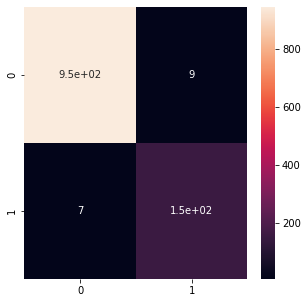

In [27]:
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(y_test, pred), annot = True)

## TF-IDF

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
tv = TfidfVectorizer(max_features = 2500)

In [30]:
X = tv.fit_transform(corpus).toarray()

In [31]:
X.shape

(5572, 2500)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [33]:
model = MultinomialNB().fit(X_train, y_train)

In [34]:
pred = model.predict(X_test)

In [35]:
accuracy_score(y_test, pred) * 100

98.29596412556054

In [36]:
confusion_matrix(y_test, pred)

array([[967,   1],
       [ 18, 129]], dtype=int64)

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
classi = RandomForestClassifier()

In [39]:
classi.fit(X_train, y_train)

RandomForestClassifier()

In [86]:
predi = classi.predict(X_test)

In [87]:
accuracy_score(y_test, predi) * 100

98.47533632286995

In [90]:
confusion_matrix(y_test, predi)

array([[967,   1],
       [ 16, 131]], dtype=int64)